# Introduction
This following Python program aims to rearrange the given folder and its subfolders in ordered way. My intention for creating this program is that I have a large collection of Videos and some of them are in folers others are without any folder, some program have subtitle and there are duplicate Videos present also there is a problem with the name of the files. So I'm Writing this program so that every file have a correct name and folder with subtitle file with the same name. I will also try to prepare a log file for the activities that are being performed and another log file for missing srt(subtitle file) files.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction

In [2]:
def ret_content(path):
    
    if not path.endswith('/'):
        path += '/'
    data = []
    
    for file in os.listdir(path):
        
        if os.path.isdir(path+file) and not file.startswith('.'):
            returned_data = ret_content(path+file)
            data.extend(returned_data)
        
        else:
            size = round(os.path.getsize(path+file) / (1024.0 * 1024.0), 3)
            file_name, extension = os.path.splitext(file)
            parent = path.split('/')[-2]
            data.append((parent, file_name, extension, size, path+file))
            
    return data

In [6]:
data = ret_content('/media/ketan/Seagate Expansion Drive/Movies/Hollywood')
# files, file_paths = ret_content("/home/ketan/Videos/vehicles")

# Data Visualization

In [7]:
data = pd.DataFrame(data, columns = ['parent_folder', 'file_name', 'extension', 'size', 'full_path'])
data = data.sort_values("file_name")
data.head()

,parent_folder,file_name,extension,size,full_path
4,Hollywood,(2005)The Exorcism of Emily Rose,.mp4,1897.171,/media/ketan/Seagate Expansion Drive/Movies/Ho...
30,Dil Se (1998) ~2CD DvDRip x264 AC3 5.1 [DDR],(sample) Dil Se (1998) ~2CD DvDRip x264 AC3 5....,.mkv,11.801,/media/ketan/Seagate Expansion Drive/Movies/Ho...
5,Hollywood,000 Point Break,.mkv,1002.280,/media/ketan/Seagate Expansion Drive/Movies/Ho...
6,Hollywood,03 Last Crusade - Harrison Ford Adventure Eng ...,.mp4,951.495,/media/ketan/Seagate Expansion Drive/Movies/Ho...
584,The Usual Suspects (1995) BRRip 720p x264 [Dua...,1,.jpg,0.080,/media/ketan/Seagate Expansion Drive/Movies/Ho...


In [8]:
print(data.extension.unique())

['.mp4' '.mkv' '.jpg' '.MKV' '.srt' '.avi' '.txt' '.sub' '.idx' '.bc!'
 '.ass' '.nfo' '.FLV' '.db' '.flv' '.zip' '.ini' '.dat']


In [9]:
extension_count = []
for ext in data.extension.unique():
    c = data[data.extension == ext].count()
    extension_count.append(c.extension)
extension_count

[284, 370, 123, 2, 148, 34, 64, 2, 2, 4, 1, 2, 3, 7, 1, 2, 2, 4]

# Number of Files with each extension

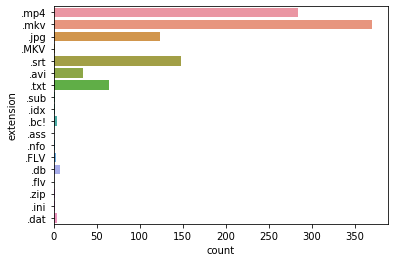

In [10]:
sns.countplot(y = 'extension', data = data)
plt.show()

# Size occupied by each extention

In [11]:
size_count = []
extensions = data.extension.unique()
index = np.arange(len(extensions))
for i in extensions:
    size_count.append(round(sum(data[data.extension == i]['size']), 3))
print(size_count)

[325974.078, 338053.722, 16.783, 3656.446, 14.765, 24059.0, 0.024, 96.633, 0.64, 10.0, 0.126, 0.007, 41.811, 0.076, 766.316, 0.069, 0.0, 2.151]


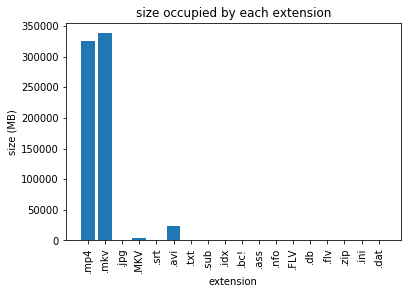

In [12]:
plt.bar(extensions, size_count)
plt.title("size occupied by each extension")
plt.xlabel("extension")
plt.ylabel("size (MB)")
plt.xticks(rotation = 90)
plt.show()

# Examples of every type of file

In [13]:
for i in data.extension.unique():
    print("Examples for :", i)
    print(data[data.extension == i]['file_name'].head(1))
    print()

Examples for : .mp4
4    (2005)The Exorcism of Emily Rose
Name: file_name, dtype: object

Examples for : .mkv
30    (sample) Dil Se (1998) ~2CD DvDRip x264 AC3 5....
Name: file_name, dtype: object

Examples for : .jpg
584    1
Name: file_name, dtype: object

Examples for : .MKV
448    10.PART 1 PIRATES OF THE CARIBBEAN
Name: file_name, dtype: object

Examples for : .srt
8    17.Again.2009.720p.BrRip.x264.YIFY
Name: file_name, dtype: object

Examples for : .avi
10    3 Musketeers
Name: file_name, dtype: object

Examples for : .txt
31    A DDR Exclusive Release
Name: file_name, dtype: object

Examples for : .sub
165    Big.Hero.6.2014.1080p.BluRay.H264.AAC-RARBG
Name: file_name, dtype: object

Examples for : .idx
164    Big.Hero.6.2014.1080p.BluRay.H264.AAC-RARBG
Name: file_name, dtype: object

Examples for : .bc!
29    Detective Byomkesh Bakshy (2015) Hindi 720p Bl...
Name: file_name, dtype: object

Examples for : .ass
243    Hotel.Transylvania.2.2015.720p.HDRip.x264-iPUN...
Name: file_

# Files Needing Renaming
some of the file contain spam texts. We need to replace them with correct one or remove them.

one of the feature that I have observed is file names which contain spam text usually have special characters.

In [14]:
def has_special_char(text: str) -> bool:
    return any(c for c in text if not c.isalnum() and not c.isspace())

In [15]:
defaulters = []
clean = []
for name in data.file_name:
    file_name, extension = os.path.splitext(name)
    if has_special_char(file_name): defaulters.append(name)
    else: clean.append(name)

In [16]:
for i in range(10):
    print(defaulters[i])

(2005)The Exorcism of Emily Rose
(sample) Dil Se (1998) ~2CD DvDRip x264 AC3 5.1 [DDR]
03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4]
17.Again.2009.720p.BrRip.x264.YIFY
17.Again.2009.720p.BrRip.x264.YIFY
2.Fast.2.Furious.2003.720p.BrRip.x264.YIFY+HI
2.Fast.2.Furious.2003.720p.BrRip.x264.YIFY+HI
310.to.Yuma.2007.720p.BrRip.x264.BOKUTOX.YIFY
3B34b13.WorldFree4u.Com
5_6246876172202803325


In [17]:
print(len(defaulters), " number of files need renaming out of", len(data.file_name))

485  number of files need renaming out of 1055


In [18]:
for i in range(10):
    print(clean[i])

000 Point Break
1
1
10
10.PART 1 PIRATES OF THE CARIBBEAN
10.PART 2 PIRATES OF THE CARIBBEAN
10.PART 3 PIRATES OF THE CARIBBEAN
11
12
13


# linux File/Directory naming convention

- Case Senstive
- a-z, A-Z, 0-9, ".", "_", " " only
- filename should not contain "/"
- 255 characters

In [19]:
def return_special_char(text: str):
    return list(c for c in text if not c.isalnum() and not c.isspace() and c not in ['_', ' '])

In [20]:
# list of all special characters in names
sp = []
for i in defaulters:
    sp.extend(return_special_char(i))
print(set(sp))

{'(', ')', '+', '[', '~', '$', '.', '-', '=', '–', ']', '{', '!', '&', '}', "'", ','}


In [23]:
def return_false_word(name):
    temp = []
    for word in name.split():
        alpha_flag = 0
        digit_flag = 0
#         upp = 0
#         low = 0
        for c in word:
            if c.isalpha():
                alpha_flag = 1
            elif c.isdigit():
                digit_flag = 1
        if alpha_flag == digit_flag:
            temp.append(word)
#         elif alpha_flag == 1 and digit_flag == 0:
    return temp

In [24]:
def suggest_name(original_name):
    new_name = original_name
    char_content = return_special_char(new_name)
    while char_content != []:
        c = char_content.pop()
        if c == ')' or c == ']'or c == '}':
            d = char_content.pop()
            start = new_name.index(d)
            end = new_name.index(c)
            new_name = new_name[:start] + new_name[end+1:]
        elif c in ['-', '$', '!', '~', "'", "=", '&', ',', '+', '.']:
            new_name = new_name.replace(c, ' ') 
    false_words = return_false_word(new_name)
    for w in false_words:
        new_name = new_name.replace(w, ' ')
    new_name = ' '.join(new_name.split())
    print(original_name, ' --- ', new_name)

In [25]:
for i in defaulters[:50]:
    suggest_name(i)

(2005)The Exorcism of Emily Rose  ---  The Exorcism of Emily Rose
(sample) Dil Se (1998) ~2CD DvDRip x264 AC3 5.1 [DDR]  ---  Dil Se DvDRip 5 1
03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4]  ---  03 Last Crusade
17.Again.2009.720p.BrRip.x264.YIFY  ---  17 Again 2009 BrRip YIFY
17.Again.2009.720p.BrRip.x264.YIFY  ---  17 Again 2009 BrRip YIFY
2.Fast.2.Furious.2003.720p.BrRip.x264.YIFY+HI  ---  2 Fast 2 Furious 2003 BrRip YIFY HI
2.Fast.2.Furious.2003.720p.BrRip.x264.YIFY+HI  ---  2 Fast 2 Furious 2003 BrRip YIFY HI
310.to.Yuma.2007.720p.BrRip.x264.BOKUTOX.YIFY  ---  310 to Yuma 2007 BrRip BOKUTOX YIFY
3B34b13.WorldFree4u.Com  ---  Com
5_6246876172202803325  ---  5_6246876172202803325
71.2014.720p.BluRay.x264.YIFY  ---  71 2014 BluRay YIFY
A DDR Release !!!  ---  A DDR Release
A Nightmare On Elm Street (2010) www.khatrimaza.org BRRip 1080p Dual Audio  ---  A Nightmare On Elm Street www khatrimaza org BRRip Dual Audio
A.Dog's.Purpose.2017.720p.BluRay.x264-[YTS.AG]  ---  A
A.Mon

# Files with same name

# Extracting file and folder information

Finding out which file is inside a folder with same name or not.
for files which don't have folders create and move the files into folders.
do the same for srt files.

In [26]:
def compare_folder_file(folder_name, file_name):
    folder_name = folder_name.split(" ")
    file_name = file_name.split(" ")
    
    word_matched = 0
    
    for i, j in zip(folder_name, file_name):
        if j.lower() in i.lower():
            word_matched += 1
    if word_matched > 0: return False
    else: return True

In [27]:
without_folders = []
for path in file_paths:
    temp = path.split('/')
    
    file_name = os.path.splitext(temp[-1])[0]
    folder_name = temp[-2]
#     file_name not in folder_name
    if compare_folder_file(folder_name, file_name):
        without_folders.append(path)
for i in range(10):
    print(without_folders[i])

NameError: name 'file_paths' is not defined